# Fourier Series

<h1>People for This Lecture</h1>

<table>
<tr>
<th><div align="center">Archimedes</div></th>
<th><div align="center">Newton</div></th>
<th><div align="center">Fourier</div></th>

</tr>
<tr>
    <td><img src="data/images/archimedes.png" width="30%"> </td>
    <td><img src="data/images/newton.png" width="40%"></td>
    <td><img src="data/images/Fourier.jpg" width="40%"></td>

</tr>
</table>




## Basics:

- Effective Data Manipulation: NumPy
- Power Scientific computing Subroutines: SciPy
- Data Visualization: Matplotlib

## Recommended Integrated Python Environment
- Our Live Linux System
- AnaConda

## Outline

- [Basics of Python](#Basics of Python)
- [Python Visualization](#Python Visualization)
- [Mathematical Basics for Signal Analysis](#Mathematical Basics)
  - [outline](#Outline)
  

<h2 id="Basics of Python">Basics of Python</h2>

## Uses of Python Library

- import numpy
        The library, numpy, Claimed to add to system and wait to be called to work
- from numpy import *
        all the properties, function, and sub-modules are loaded and ready to work (NOT RECOMMENDED)
- import numpy as np
        like the first case, but called by np but not by numpy 
   

In [1]:
%matplotlib inline
import numpy as np
from numpy import pi,sin,cos,linspace,int16
import scipy
import scipy.fftpack
import matplotlib.pyplot as plt
from matplotlib.pyplot import specgram
from scipy.io.wavfile import read,write

from matplotlib.pylab import plot,show,axis
from IPython.display import Audio,Image
import os

## How to define a math function
Theoretically, define the function on the given domain. But in computing applications, it is better to given an "array" of data in domain with their function values since a bounded interval contains infinite points!

- math expresion

      t0       t1       t2      ...  tn
      sin(t0)  sin(t1)  sin(t2) ...  sin(tn)

- Python expression
      t=numpy.linspace(t0,tn, n+1)
      sin(t)

In [2]:
# Define a sine function over [0,2*pi]
array1=np.linspace(0,2*pi,401)

In [3]:
array1[0:10]

array([ 0.        ,  0.01570796,  0.03141593,  0.04712389,  0.06283185,
        0.07853982,  0.09424778,  0.10995574,  0.12566371,  0.14137167])

In [4]:
SinData=sin(array1)
print(SinData[-10:])

[ -1.40901232e-01  -1.25333234e-01  -1.09734311e-01  -9.41083133e-02
  -7.84590957e-02  -6.27905195e-02  -4.71064507e-02  -3.14107591e-02
  -1.57073173e-02  -2.44929360e-16]


<h2 "Python Visualization">Python Visualization</h2>

Doing Scientitific computation requires basic knowledge about data manipulation; but result explanation could be displayed only by a good visualization!

Here, matplotlib is our best choice to do final data visualization.

## Usages

- In IPython Notebook environment: use magic, "%matplotlib inline"
- import matplotlib.pylab as plt
- plt.plot(x,y) (or plt.scatter(x,y))

In [5]:
%matplotlib inline
import matplotlib.pylab as plt

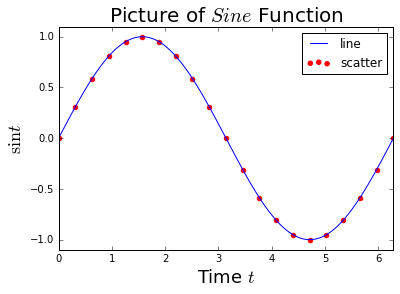

In [6]:
plt.plot(array1,SinData,label='line')
plt.scatter(array1[::20],SinData[::20],color='red',label='scatter')

plt.title(r'Picture of $Sine$ Function',size=20)
plt.xlabel(r'Time $t$',size=18)
plt.ylabel(r'$\sin t$',size=18)
plt.xlim(0,2*pi)
plt.ylim(-1.1,1.1)

plt.legend()

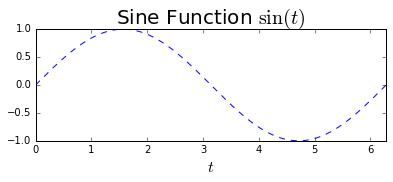

In [7]:
## Exact Scale

plt.figure(figsize=[2*pi,2])
plt.title("Sine Function $\sin(t)$",size=20)
plt.plot(array1,SinData,"--")
plt.axis([0,2*pi,-1,1])
plt.xlabel("$t$",size=16)

## Exercise
Observe the picture of $\sin(x+3/x)$.

In [ ]:
x=np.linspace(-2*pi,2*pi,400)
np.plot(x,sin(x+3/x))

<h2 id="Mathematical Basics">Mathematical Basics</h2>

<h2>Fourier Expansion</h2>

An intergrable periodic function, $f(x)$, on $[a.b]$ can be expanded as following convergent Fouries series:
$$f(x)=\sum\limits_{n=0}^\infty(a_n \cos(2n\pi x )+b_n \sin(2n\pi x)), n=0,1,2,\cdots$$

In brief, such kind functions can be assembled by infnity sine and cosine functions. 
The intensity of $a_n,b_n$ ca be calculated by:

$$a_n=\frac{1}{\pi}\int_{-\pi}^\pi f(x) \cos(2n\pi x)d x\\
  b_n=\frac{1}{\pi}\int_{-\pi}^\pi f(x) \sin(2n\pi x)d x$$


The following simulated picture is the following square wave:
$$\sum\limits_{n=0}^\infty\frac{\sin((2n+1)\pi x)}{2n+1}$$

##Basics of Fourier Series and Fourier Transform

<img src="data/images/fft.gif">

<h3 id="Outline">Outline</h3>
* [Square Wave by Fouries Series](#Fourier Series)
* [Codes behind Picture](#Flag of France)
* [Example of Fouries Series](#Square Wave)
* <a href="#Computer Music">Computer Music</a>
* <a href="#Compose Music">Compose Music</a>

* Spectrums of Sound

<h3 id="Fouries Series">What Fouries Series is</h3>

<h2 id="Square Wave">Square Wave</h2>

$$f(t)=\sin(t)+\frac{\sin(3t)}{3}+\frac{\sin(5t)}{5}+\frac{\sin(7t)}{7}+\frac{\sin(9t)}{9}$$

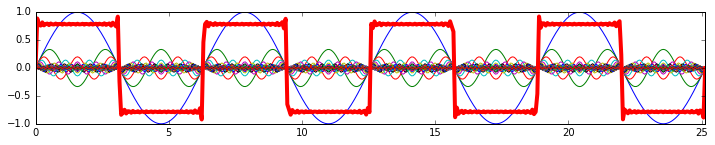

In [8]:
t=np.linspace(0,8*np.pi,400)
plt.figure(figsize=(12,2))
plt.xlim([0,8*np.pi])
plt.ylim([-1,1])
n=31
f=0
for i in np.arange(n): 
    f+=sin((2*i+1)*t)/(2*i+1.)
    plt.plot(t,sin((2*i+1)*t)/(2*i+1.))
plt.plot(t,f,'r',lw=4)

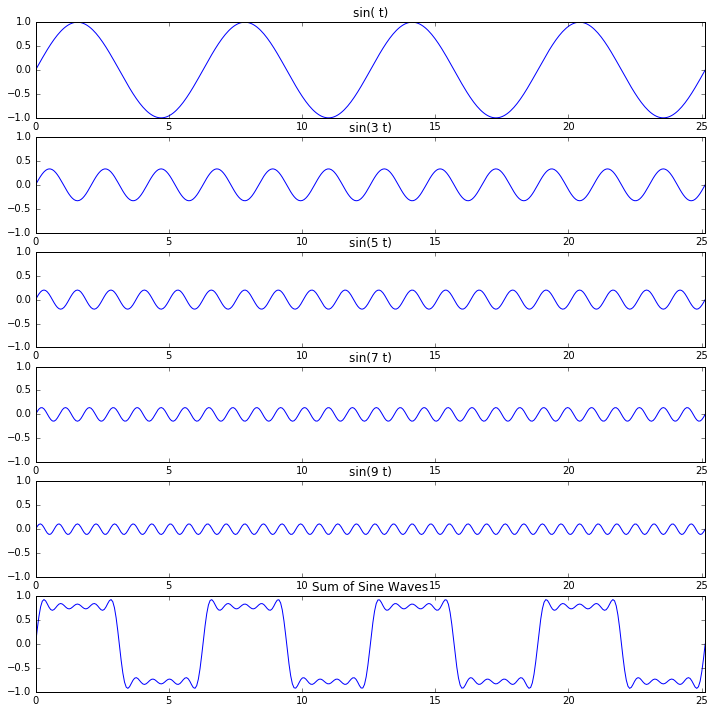

In [9]:
t=np.linspace(0,8*np.pi,400)
f=sin(1*t)/1.+sin(3*t)/3.+sin(5*t)/5.+sin(7*t)/7.+sin(9*t)/9.
plt.figure(figsize=(12,12))

for i in np.arange(5):
    plt.subplot(6, 1, i+1)
    plt.xlim([0,8*np.pi])
    plt.ylim([-1,1]) 
    n=2*i+1
    if (i==0):
       plt.title(r'sin( t)')
    else:
       plt.title(r'sin(%d t)' %n)
    plt.plot(t,sin((2*i+1)*t)/(2*i+1.))

plt.subplot(6, 1, 6)
plt.title('Sum of Sine Waves')
plt.xlim([0,8*np.pi])
plt.plot(t,f)

## Note:

- From above pictures, the amptitude of $\sin\frac{(2n+1)\pi}{2n+1}$ decreases rapidly such that the higher term can be omitted in applications.
- The noises occurs because of the omitted terms

<h3>Question</h3>
What is the picture about the following function:
$$f(t)=\sin(t)-\frac{\sin(2t)}{2}+\frac{\sin(3t)}{3}-\frac{\sin(4t)}{4}+\frac{\sin(5t)}{5}-\frac{\sin(6t)}{6}+\cdots$$


In [ ]:
t=np.linspace(0,8*np.pi,400)
plt.figure(figsize=(12,2))
plt.xlim([0,8*np.pi])
plt.ylim([-2,2])
f=0
for i in np.arange(6): 
    f+=(-1)**(i+1)*sin((i+1)*t)/(i+1.)
    plt.plot(t,(-1)**(i+1)*sin((i+1)*t)/(i+1.))
plt.plot(t,f,'r',lw=4)

## Note
Suppose that 
$$f(x)=\sum_n a_n \sin nt +b_n \cos nt$$

- How to specify the terms suche that $a_n$ or $b_n$ is not zero? 

  - $\int_0^{2\pi} \sin nt \sin mt dt \neq 0 \text{ if } m= n$;
  - $\int_0^{2\pi} \cos nt \cos mt dt \neq 0 \text{ if } m= n$.
- Conclusion:
  - $\int_0^{2\pi} f(t) \sin nt dt \neq0 \to a_n\neq0$;
  - $\int_0^{2\pi} f(t) \cos nt dt \neq0 \to b_n\neq0$
  - $n$ is called the spectrum if $a_n (b_n)\neq0$.

<h2 id="Flog of France">Flag of France</h2>

### What the codes Hidden Within the Flag of France

- make the flag
- Find out the spectrum for each segment, each $n$ i fouries series: by <font color="lightblue">matplotlib.pyplot.specgram</font>

In [12]:
rate=20000
t = np.linspace(0.0, 12.0, 12.*rate)
s1 = sin(2*pi*400*t)
s2 = 2*sin(2*pi*200*t)
s3 = 3*sin(2*pi*800*t)

mask1 = np.where(np.logical_and(t>0, t<4), 1.0, 0.0)
mask2 = np.where(np.logical_and(t>4, t<8), 1.0, 0.0)
mask3 = np.where(np.logical_and(t>8, t<12), 1.0, 0.0)
s1=s1*mask1
s2=s2*mask2
s3=s3*mask3

(0, 1)

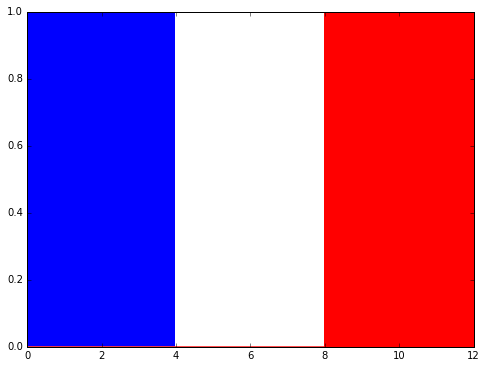

In [13]:
plt.figure(figsize=(8,6))
plt.plot(t,s1,'b',t,s2,'w',t,s3,'r')
plt.ylim(0,1)

(0, 1000)

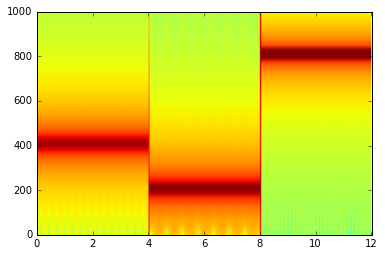

In [14]:
Pxx, freqs, bins, im=specgram(s1+s2+s3,Fs=rate,NFFT=1024)
plt.ylim(0,1000)

<h2 id="Computer Music">Computer Music</h2>

### Tools for Making Sound

In Desktop environment,  use <a href="sox.sf.net">sox</a> to create demo samplea (Sine-based):
        
    > sox --null -r 22050 sine_a.wav synth 0.2 sine 400
    > sox --null -r 22050 sine_b.wav synth 0.2 sine 3000
    > sox --combine mix --volume 1 sine_b.wav --volume 0.5 sine_a.wav sine_mix.wav

### Python Tools

 Sound transmits as oscillation of wave, described as the following formula:
$$ \text{Signal} (t) = A \sin (2 \pi f t) $$
where $A$ is amplitude and $f$ is the frequency of wave. Sound wave is
sampled as a sequence of discrete digital signals. In general CD standard,
there are 44100 samples for one second sound playing, i.e. 44.1 KHz, i.e.
$$ S_n ( t) = A \sin ( 2 \pi f \frac{n} { s}) $$
where $n = 0, 1, 2, \cdots, s$ and $s$ is the sample rate (here $s$=44,100).

Then create the sound array by <font color="brown">NumPy</font>!

Briefly,
---
From Analog Wave (in one second in 44,100 Hz):
$$A \sin (2 \pi f t), t\in[0,1]$$
To Digital Sequences:
$$ S_n ( t) = A \sin \left( \frac{2 \pi f  n} { 44100}\right) ,n=0,1,\cdots,44100$$

##Numbers to Digital Sound

Assume $A = 1$.

Since $\{ S_n ( t) \}$ 
is a sequence of float numbers between 0 and 1, **Computer can not play
them directly**! 


Each of them has to be transformed from float value into 
2-bytes-integer data. And amplitude has to be consideable with the scale, $2^{15} - 1$, i.e.
the maximum size of 2 bytes data.



$${\text{Analog Sound}}  \overset{\text{Sampling}}{\Longrightarrow}{S_n(t)} 
\overset{2 \text{ bytes data}}{\Longrightarrow}{b_n(t)}
\underset{\text{amplified}}{\overset{\cdot(2^{15} - 1)}{\longrightarrow}}
\text{Digital sound}
$$



```  
    Tone	 Freq
     A	      440
     B flat	  466
     B        494
     C	      523
     C sharp  554
     D	      587
     D sharp  622
     E	      659
     F	      698
     F sharp  740
     G	      784
     A flat	  831
     A	      880
```     

In [2]:
def note(freq, len, amp=1, rate=44100):
    t = np.linspace(0,len,len*rate)
    data = sin(2*pi*freq*t)*amp
    return data.astype(int16) # two byte integers

In [3]:
if not os.path.exists('data/sound'):
    os.makedirs('data/sound')

In [4]:
rate2=22050
amp2=2**15-1
t0=0.2
tone = note(440,t0,amp=amp2,rate=rate2)
write('data/sound/440hzAtone.wav',44100,tone)

[0, 0.05, -32768, 32768]

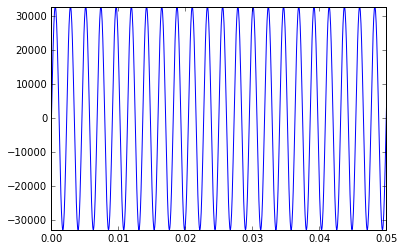

In [104]:
plot(linspace(0,t0,t0*rate2),tone)
axis([0,0.05,-2**15,2**15])

In [105]:
from IPython.display import Audio
Audio('data/sound/440hzAtone.wav')

(0, 1000)

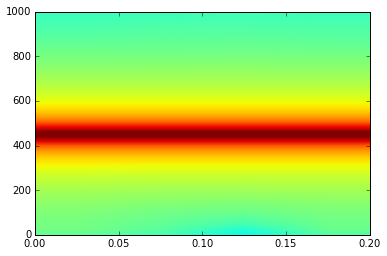

In [14]:
specgram(tone, Fs = rate2,xextent=(0,t0),NFFT=1024)
plt.ylim([0,1000])

In [20]:
toneB = note(780,t0,amp=amp2,rate=rate2)
write('data/sound/780hzAtone.wav',amp2,toneB)

[0, 0.05, -30, 30]

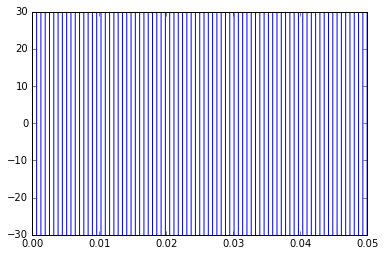

In [21]:
plot(linspace(0,t0,t0*rate2),toneB)
axis([0,0.05,-2*15,2*15])

In [22]:
Audio('data/sound/780hzAtone.wav')

(0, 1000)

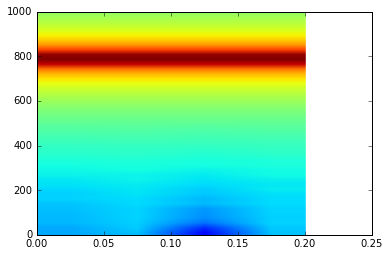

In [23]:
#B_SampleRate, B= read("data/sound/780hzAtone.wav")

PxxB, freqsB, binsB, imB=specgram(toneB,Fs=rate2,xextent=(0,t0),NFFT=1024)
plt.ylim([0,1000])

In [39]:
toneC=(tone/2.+toneB/2.).astype(int16)
write('data/sound/mixtone.wav',amp2,toneC)

[0, 0.05, -15000, 15000]

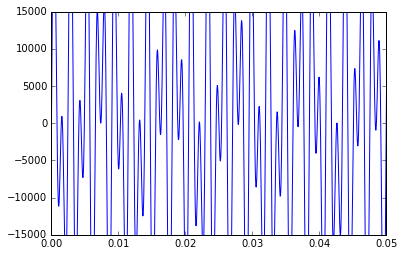

In [25]:
plot(linspace(0,t0,t0*rate2),toneC)
axis([0,0.05,-15000,15000])

In [26]:
Audio('data/sound/mixtone.wav')

(0, 0.2)

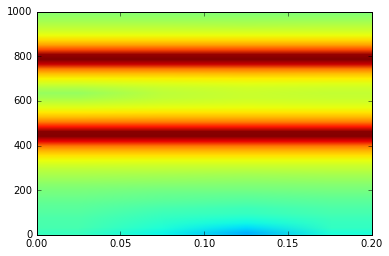

In [28]:
#M_SampleRate, M= read("data/sound/mixtone.wav")

specgram(toneC,Fs=rate2,xextent=(0,t0),NFFT=1024)
plt.ylim([0,1000]);plt.xlim([0,0.2])

<h2 id="Compose Music">Compose Music</h2>

Python's scitools module provides plenty of tools which make Python coding much easily, including sound processing.

In [5]:
def make_sound(x):
    fname = 'data/tmp.wav'
    
    tones = []
    max_amplitude=2**15-1
    rate2=44100
    duration = 0.5     # 30 sec sound in total
    for n in range(len(x)):
        #tones.append(max_amplitude*note(x[n], duration))
        tones.append(note(x[n],duration,amp=max_amplitude,rate=rate2))
    data = np.concatenate(tones)
    write(fname,44100,data)
    data = read(fname)
    return Audio(fname)

In [6]:
def make_sound2(x,fname,timerate=1.):
    """ 
      x: sound data in 2-element, [tone,playinf-time]
      fname: saved music name
      e.g. create music and saved as data/tmp.wav:
        X=np.array([[C,0.5],[D,0.5]])
        make_sound2(X,'data/tmp.wav')
    """
    max_amplitude=2**15-1
    rate2=44100
    tones = []
    for X in x:
        #note(X[0],X[1],amp=amp2,rate=rate2)
        #tones.append(0.9*max_amplitude*note(X[0], X[1]*0.66))
        tones.append(note(X[0],X[1]*timerate,amp=max_amplitude,rate=rate2))
    data = np.concatenate(tones)
    #print(len(data))
    write(fname,44100,data)

In [7]:
"""
    Do (C): 261.63
    Re (D): 293.66
    Mi (E): 329.23
    Fa (F): 349.23
    So (G): 392.
    La (A): 440.
    Si (B): 493.88
"""
C,D,E,F,G,A,B=261.63,293.66,329.23,349.23,392.,440.,493.88,
G3=195.
O,C1=0.,523.25

In [70]:
#H=300.
H2=np.array([[E,0.2],[O,0.2],[E,0.4],[O,0.2],[E,0.2],[O,0.4],[C,0.2],[O,0.2],[E,0.4],[O,0.4],[G,0.4],[O,0.2],[G3,0.4]])
#x=np.array([392.,329.23,329.23,349.23,293.66,293.66,0.,
#             261.63,293.66,329.23,349.23,392.,0.,392,])
#X=np.array([G,E,E,O,F,D,D,O,C,D,E,F,G,G,G,O,G,E,E,O,F,D,D,O,
#             C,E,G,G,C])
#Y=np.array([C,E,D,G,E,D,C,D,G,E,A,B,G,A,F,G,O,G,C1,G,A,G,E,G,C1,B,O,B,
#             A,O,A,G,G,F,E,G,D,G,O,C,D,E,D,C,O,C])  
#m=np.array([H,H,H,H,H,H,H,H,H,H,0.,0.])
make_sound2(H2,'data/audio/test1.wav',0.6)

In [69]:
Audio('data/audio/test1.wav')

### Practice

- What is the sound track playing above?

### Practice

- Compose a piece of digital music which you favor.

## Echo
$$a_n=\beta a_n+(1-\beta)a_{n-b}$$
where $\beta\in[0,1]$ and $b$ is the delay time.

In [29]:
x=np.array([392.,329.23,329.23,349.23,293.66,293.66,0.,
             261.63,293.66,329.23,349.23,392.,0.,392,])
X=np.array([G,E,E,O,F,D,D,O,C,D,E,F,G,G,G,O,G,E,E,O,F,D,D,O,
             C,E,G,G,C])
y=np.array([C,E,D,G,E,D,C,D,G,E,A,B,G,A,F,G,O,G,C1,G,A,G,E,G,C1,B,O,B,
             A,O,A,G,G,F,E,G,D,G,O,C,D,E,D,C,O,C])
y1=y.copy()
d=2
a_=0.7

y1[d:]=a_*y[d:]+(1-a_)*y[:len(y)-d]
make_sound(y1)

## Guitar Sound
$$ a_n=(a_{n-p}+a_{n-p+1})/2$$
where $n=p+1,p+2,\cdots,N$.

In [23]:
def node(freq, length, amplitude=2**15-1, sample_rate=44100):
    filename = 'data/guitar_tmp.wav'
    t_points =np.linspace(0,length,length*sample_rate)
    data = np.sin(2*np.pi*freq*t_points)
    data=0.001*amplitude*data
    write(filename,sample_rate,data)
    data = read(filename)
    return Audio(filename)

In [28]:
# CD sound quality    
sample_rate=44100
play_time=3
# play A tone

A=440
C=261.63

p = sample_rate/C
z=np.zeros(play_time*sample_rate)

z[:p+1]=np.random.uniform(-0.9,0.9,p+1)
new_z=z.copy()
for i in np.arange(p+1,len(z)):
    z[i]=(z[i-p]+z[i-p-1])/2.

node(z,play_time)

/Users/cch/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:12: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Users/cch/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:15: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


### Watch Sound Wave

In [112]:
A_SampleRate, A= read("data/audio/sine/sine_a.wav")
B_SampleRate, B= read("data/audio/sine/sine_b.wav")
M_SampleRate, M= read("data/audio/sine/sine_mix.wav")

(0, 0.2)

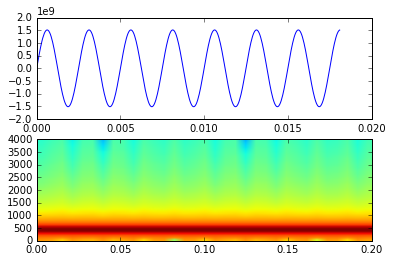

In [114]:
t0=0.2

TimeA=np.linspace(0, t0, num=len(A))
plt.title('400 Hz')
plt.subplot(211)
plt.plot(TimeA[0:400],A[0:400])
plt.subplot(212)
PxxA, freqsA, binsA, imA=specgram(A,Fs=A_SampleRate,xextent=(0,t0))
plt.ylim([0,4000]);plt.xlim([0,t0])

(0, 0.2)

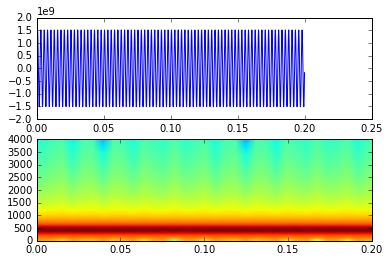

In [115]:
t0=0.2
TimeA=np.linspace(0, t0, num=len(A))
plt.subplot(211)
plt.plot(TimeA,A)
plt.subplot(212)
PxxA, freqsA, binsA, imA=specgram(A,Fs=A_SampleRate,xextent=(0,t0))
plt.ylim([0,4000]);plt.xlim([0,t0])

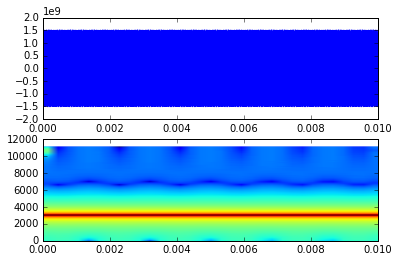

In [116]:
t0=0.01
TimeB=np.linspace(0, t0, num=len(B))
plt.subplot(211)
plt.plot(TimeB,B)
plt.subplot(212)
PxxB, freqsB, binsB, imA=specgram(B,Fs=B_SampleRate,xextent=(0,t0))

(0, 6000)

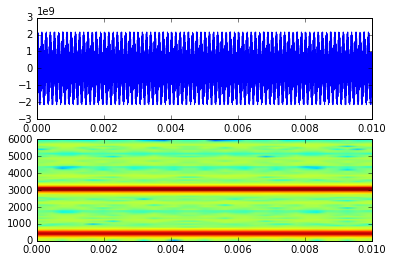

In [117]:
t0=0.01
TimeM=np.linspace(0, t0, num=len(M))
plt.subplot(211)
plt.plot(TimeM,M)
plt.subplot(212)

PxxM, freqsM, binsM, imA=specgram(M,Fs=M_SampleRate,xextent=(0,t0))
plt.ylim([0,6000])

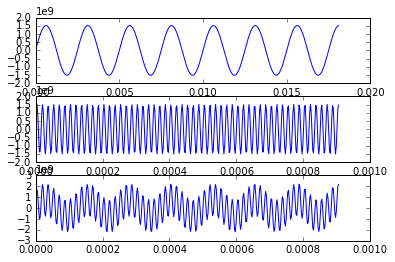

In [118]:
plt.subplot(311)
plt.plot(TimeA[0:400],A[0:400])
plt.subplot(312)
plt.plot(TimeB[0:400],B[0:400])
plt.subplot(313)
plt.plot(TimeM[0:400],M[0:400])

<h2 id="Denoizing processing">Denoizing processing</h2>

Here we will illustrate how to denoize the white noise for two-dimensional picture via FFT.

In [143]:
fname = 'data/images/moonlanding.png'
im = plt.imread(fname).astype(float) 
print("Image shape: %s" % str(im.shape) )

Image shape: (474, 630)


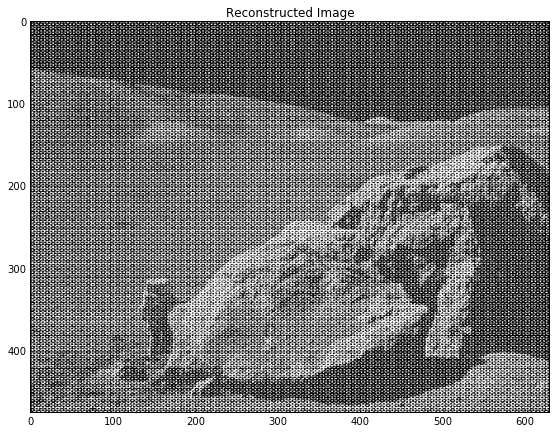

In [144]:
fig, ax = plt.subplots(figsize=(10,7))

ax.set_title('Reconstructed Image')
ax.imshow(im, plt.cm.gray);

In [145]:
def plot_spectrum(F, amplify=1000, ax=None):
    """Normalise, amplify and plot an amplitude spectrum."""

    # Note: the problem here is that we have a spectrum whose histogram is
    # *very* sharply peaked at small values.  To get a meaningful display, a
    # simple strategy to improve the display quality consists of simply
    # amplifying the values in the array and then clipping.

    # Compute the magnitude of the input F (call it mag).  Then, rescale mag by
    # amplify/maximum_of_mag.
    mag = abs(F) 
    mag *= amplify/mag.max() 
    
    # Next, clip all values larger than one to one.
    mag[mag > 1] = 1 

    if ax is None: ax = plt.gca()
    ax.imshow(mag, plt.cm.Blues)

## White Noise

White Noise is the high peak frequency generally appeared in signals, as the white lines in the above picture. 

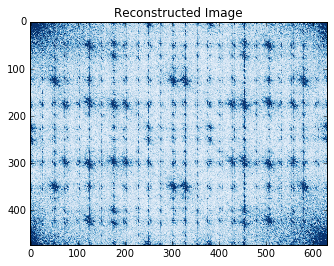

In [146]:
F = np.fft.fft2(im)  


fig, ax = plt.subplots()

ax.set_title('Reconstructed Image')
plot_spectrum(F);

In [147]:
F = np.fft.fft2(im)  

# Define the fraction of coefficients (in each direction) we keep
keep_fraction = 0.1

# Call ff a copy of the original transform.  Numpy arrays have a copy
# method for this purpose.
ff = F.copy() 

# Set r and c to be the number of rows and columns of the array.
r,c= ff.shape 

# Set to zero all rows with indices between r*keep_fraction and
# r*(1-keep_fraction):
ff[r*keep_fraction:r*(1-keep_fraction)] = 0  

# Similarly with the columns:
ff[:, c*keep_fraction:c*(1-keep_fraction)] = 0 

/Users/cch/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:15: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Users/cch/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:18: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


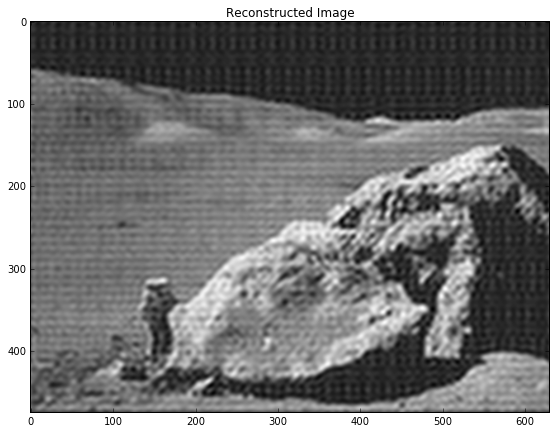

In [148]:
im_new = np.fft.ifft2(ff).real  

fig, ax = plt.subplots(figsize=(10,7))

ax.set_title('Reconstructed Image')
ax.imshow(im_new, plt.cm.gray);

In [31]:
!jupyter nbconvert --to slides Fourier.ipynb


[NbConvertApp] Converting notebook Fourier.ipynb to slides
[NbConvertApp] Writing 6667298 bytes to Fourier.slides.html
